# Геморное домашнее задание №1

<img src='https://i0.wp.com/media4.giphy.com/media/AlBHDuku3H7fG/giphy.gif'><br>

# Загрузка данных

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

/kaggle/input/2021-homework1-multiclass-classification/sample_submission.csv
/kaggle/input/2021-homework1-multiclass-classification/train.csv
/kaggle/input/2021-homework1-multiclass-classification/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/2021-homework1-multiclass-classification/train.csv', sep=';')
test = pd.read_csv('/kaggle/input/2021-homework1-multiclass-classification/test.csv', sep=';')
submission = pd.read_csv('/kaggle/input/2021-homework1-multiclass-classification/sample_submission.csv')

In [3]:
'train: ', train.shape, 'test: ', test.shape

('train: ', (39481, 15), 'test: ', (9871, 14))

Результат нужно сохранить в **csv файл с двумя колонками**: 

listing_id - берете из датасета

interest_level - проставляете своим алгоритмом

Разделитель **запятая**, при сохранении с помощью result.to_csv() - не забывайте указывать index=None.

In [4]:
submission.head()

listing_id  interest_level
0     7077863               0
1     7089371               0
2     7210791               0
3     6817348               0
4     7149366               0

## Анализ данных
## 1. Предобработка и генерация признаков

Для выполнения задания попробуйте придумать признаки на основе имеющихся данных, для работы с текстовыми полями вам может пригодится LabelEncoder/OneHotEncoder, re.sub(),re.findall() 

Ниже представлены имеющиеся у нас признаки. Можно попробовать сгенерировать из них новые. Например, можно сделать признак Стоимость за комнату, признаки на основе значений в features, выделить и закодировать адрес, так же можно попробовать оценить "успешность" менеджера, предположив, что чем больше объявлений у данного manager_id - тем он круче.

In [5]:
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

In [6]:
train.head()

bathrooms  bedrooms                       building_id              created  \
0        1.0         0  cb0ecd5356125b546833239efdb154c2  2016-06-02 04:21:46   
1        1.0         2  4df46d9768a98df24200a2e7693370bd  2016-05-26 05:44:12   
2        1.0         0                                 0  2016-06-17 01:22:32   
3        1.0         1  78e50c94b33bb1ceeb5f4c8ff7455703  2016-06-03 05:26:40   
4        2.0         0  e87f1236b102798c1fa104a372800444  2016-04-12 04:10:28   

                                         description   display_address  \
0          AMAZING STUDIO!! CONVENIENT TO ALL - G...       Gold Street   
1  Near NYU, Washington SQ Park, centrally locate...   Thompson Street   
2  RENT STABILIZED! FULL TIME DOORMAN.LEXINGTON A...  East 35th Street   
3  WHY TO LIVE IN THIS LUXURIOUS BUILDING? WEEKDA...  West 42nd Street   
4          Listed on the National Register of His...  Greenwich Street   

                                            features  latitude  listing_id  \
0                   ['Cats Allowed', 'Dogs Allowed']   40.6969     7097709   
1                                                 []   40.7264     7071860   
2        ['Doorman', 'Dogs Allowed', 'Cats Allowed']   40.7466     7174524   
3  ['Swimming Pool', 'Roof Deck', 'Dining Room', ...   40.7610     7104515   
4            ['Doorman', 'Fitness Center', 'No Fee']   40.7324     6859942   

   longitude                        manager_id  \
0   -73.9830  79d1809d224bc7f26c719f247d6c8dc6   
1   -74.0013  e60b02e0cfd2eea7d777bb283d6f8d4d   
2   -73.9779  91a276fdb4c7ae5ff56fd0884b5121db   
3   -73.9992  cbcd513212d592e6c717d27be14f46ac   
4   -74.0081  b209e2c4384a64cc307c26759ee0c651   

                                              photos  price  \
0  ['https://photos.renthop.com/2/7097709_8f74305...   2575   
1  ['https://photos.renthop.com/2/7071860_32b196a...   3250   
2  ['https://photos.renthop.com/2/7174524_bde8df9...   2448   
3  ['https://photos.renthop.com/2/7104515_bab0753...   3300   
4  ['https://photos.renthop.com/2/6859942_16f88f7...   5450   

         street_address interest_level  
0       257 Gold Street            low  
1   128 Thompson Street           high  
2  165 East 35th Street            low  
3  610 West 42nd Street            low  
4  666 Greenwich Street            low

In [7]:
train.interest_level.value_counts()

low       27446
medium     8941
high       3094
Name: interest_level, dtype: int64

In [8]:
train.interest_level.value_counts(normalize=True)

low       0.695170
medium    0.226463
high      0.078367
Name: interest_level, dtype: float64

**Строки превращаем обратно в список**

In [9]:

train.features

0                         ['Cats Allowed', 'Dogs Allowed']
1                                                       []
2              ['Doorman', 'Dogs Allowed', 'Cats Allowed']
3        ['Swimming Pool', 'Roof Deck', 'Dining Room', ...
4                  ['Doorman', 'Fitness Center', 'No Fee']
                               ...                        
39476                     ['Dogs Allowed', 'Cats Allowed']
39477    ['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...
39478                       ['Elevator', 'Fitness Center']
39479    ['Pre-War', 'Laundry in Unit', 'Dishwasher', '...
39480    ['Doorman', 'Fitness Center', 'Elevator', 'Sto...
Name: features, Length: 39481, dtype: object

In [10]:
train['features']=train['features'].str.replace('[\[\]\']', '').str.split(', ')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
train['features']

0                             [Cats Allowed, Dogs Allowed]
1                                                       []
2                    [Doorman, Dogs Allowed, Cats Allowed]
3        [Swimming Pool, Roof Deck, Dining Room, Doorma...
4                        [Doorman, Fitness Center, No Fee]
                               ...                        
39476                         [Dogs Allowed, Cats Allowed]
39477    [Swimming Pool, Doorman, Elevator, Fitness Cen...
39478                           [Elevator, Fitness Center]
39479    [Pre-War, Laundry in Unit, Dishwasher, Hardwoo...
39480    [Doorman, Fitness Center, Elevator, Storage, P...
Name: features, Length: 39481, dtype: object

In [12]:
f_set = set()
train['features'].apply(lambda x: f_set.update(x))
len(f_set)

1378

In [13]:
train['num_features']=train['features'].apply(len)

Фотографии можно спарсить по ссылкам, но т.к. обработка изображений в этой домашке не в приоритете, можно просто посчитать количество фотографий.

In [14]:
train['photos']=train['photos'].str.replace('[\[\]\']', '').str.split(', ')
train['num_photos']=train['photos'].apply(len)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Делаем самые простые фичи. В данном случае просто считаем кол-во слов в описании.

В датасете присутствуют NaN, поэтому предварительно заполняем пропуски пустыми строками.

In [15]:
train["num_description_words"]=train["description"].fillna('').apply(lambda x: len(x.split(" ")))

Может быть заинтересованность объявлением зависит от времени года или времени публикации?

In [16]:
train["created"]

0        2016-06-02 04:21:46
1        2016-05-26 05:44:12
2        2016-06-17 01:22:32
3        2016-06-03 05:26:40
4        2016-04-12 04:10:28
                ...         
39476    2016-06-20 18:09:47
39477    2016-04-26 05:40:27
39478    2016-04-10 03:20:09
39479    2016-06-03 03:53:35
39480    2016-06-15 02:29:10
Name: created, Length: 39481, dtype: object

In [17]:
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day
train["created_hour"] = train["created"].dt.hour

<AxesSubplot:xlabel='index'>

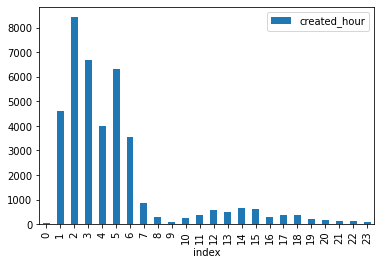

In [18]:
hours=train["created_hour"].value_counts().reset_index().sort_values(by='index')
hours.plot(x='index', y='created_hour', kind='bar')

не похоже что стоит использовать created_month в модели

<AxesSubplot:xlabel='index'>

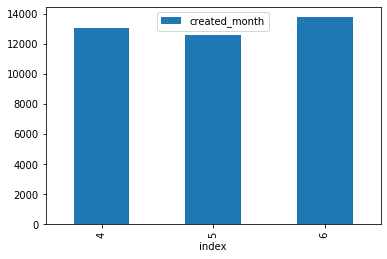

In [19]:
months=train["created_month"].value_counts().reset_index().sort_values(by='index')
months.plot(x='index', y='created_month', kind='bar')

Высчитываем кол-во объявлений для каждого менеджера

In [20]:
manager_id_count_dict = train.groupby(['manager_id']).size().reset_index(name='manager_id_counts').set_index('manager_id').to_dict().get('manager_id_counts')

In [21]:
train['manager_id_counts'] = train['manager_id'].apply(lambda x: manager_id_count_dict.get(x))

Обрабатывем description

In [22]:
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
stop_words = set(stopwords.words('english'))
stop_words.add('br')

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
def preprocessing(str):
    pattern = re.compile(r'[^A-Za-z]+')
    str = "".join(lemmatizer.lemmatize(re.sub(pattern,' ',str).strip().lower()))
    words = re.split('\s+',str)
    words = [word for word in words if not word in stop_words]
    return " ".join(words)

In [26]:
train['description'] = train['description'].fillna('').apply(lambda s: preprocessing(s))

Высчитываем расстояние до манхэттена

In [27]:
import math

In [28]:
def distance_from_manhattan(lat,long):
    manhattan_lat = 40.78343
    manhattan_long = -73.96625
    return math.sqrt(math.pow(manhattan_lat - lat,2)+math.pow(manhattan_long - long,2))
    

In [29]:
train['manhattan_distance'] = train.apply(lambda x: distance_from_manhattan(x['latitude'],x['longitude']),axis=1)

Проверяем разрешены ли животные

In [30]:
pet_set = set()
checklist = {'cat', 'dog', 'cats','dogs','pet','pets'}
for s in f_set:
    common_words = set(s.lower().split()) & checklist
    if len(common_words) > 0 and 'no' not in set(s.lower().split()):
        print(s)
        pet_set.add(s)

** SPRAWLING TRUE 2BR SUPER SHARE * EXPOSED BRICK * SCENIC ROOF DECK * PETS OK **
** CLASSY CORNER STUDIO * OVERSIZED & UNDERPRICED * WINDOWS ALL AROUND * PETS OK **
** OVERSIZED 1BR HOME * GUT RENOVATED * PERFECT NATURAL LIGHT * HEART OF CHELSEA * PETS OK **
Pet Friendly
** OVERSIZED & UNDERPRICED * CLASSY CORNER STUDIO * ALL MODERN & NEW * PERFECT SUNLIGHT * PETS OK **
** MIDTOWN MANSION * SPRAWLING SUNFILLED STUDIO * UTILITIES INCLUDED * DOORMAN * ELEV/LNDRY BLDG * PETS OK **
pets
small pets allowed
Dogs Allowed
** CLASSY CONV 2BR DUPLEX DREAM! * ROOM TO ENTERTAIN * LNDRY BLDG * CATS OK * HEART OF THE VILLAGE **
** SPACIOUS STUDIO SUPREME * AMAZING CORNER LAYOUT * TONS OF SUNLIGHT * PETS OK **
Pets Allowed
Pet friendly ( case by case )
One small dog ok on approval
** PRISTINE MODERN TOWNHOUSE! * MASSIVE 2BR HOME * CHEF INSPIRED KITCHEN * HUGE WINDOWS GALORE * CATS OK **
Pets - case by case.
* MARVELOUS MIDTOWN GEM * SPACIOUS SUNDRENCHED STUDIO * STUNNING PREWAR DETAILS * CATS OK **


In [31]:
def intersection_between_sets_exists(set_one,set_two):
    if len(set(set_one) & set_two) > 0:
        return True
    return False

In [32]:
train['pets_allowed'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,pet_set))

проверка до военный или нет

In [33]:
pre_war_set = set()
pre_war_checklist = {'pre-war','prewar'}
for s in f_set:
    common_words = set(s.lower().split()) & pre_war_checklist
    if len(common_words) > 0 and 'post' not in set(s.lower().split()):
        print(s)
        pre_war_set.add(s)

** MIDTOWN MARVEL! * MASSIVE 1BR HOME * GOURMET KITCHEN * UNIQUE PREWAR DETAILS * ROOMY CLOSETS * ALL NEW **
PRE-WAR
Pre-War
** MIDTOWN MIRACLE * SPRAWLING 2BR SUPER SHARE * SS EAT-IN KITCHEN * FRENCH DOORS * ORNATE PREWAR DETAILS **
* MARVELOUS MIDTOWN GEM * SPACIOUS SUNDRENCHED STUDIO * STUNNING PREWAR DETAILS * CATS OK **
** HUGE TRUE 2BR SUPER SHARE * ORNATE PREWAR DETAILS * SO FRESH & SO CLEAN * L TRAIN BABY! **
"** EXTRA SWEET EAST VILLAGE! * MASSIVE 2BR HOME * ORNATE PREWAR DETAILS * EXPOSED BRICK * COOKS KITCHEN * PETS OK **"
** MURRAY HILL NO FEE MANSION * SPRAWLING 1BR HOME * ORNATE PREWAR DETAILS * GOURMET KITCHEN * WINDOWS ALL AROUND **
prewar
Prewar
Pre-war Charm
** EXPANSIVE 4BR DUPLEX DREAM SHARE * GARDEN! * HUGE WINDOWS GALORE * ORNATE PREWAR DETAILS * 2 BLKS TO BEDFORD L **
** MASTERFUL BKLN MANSION! * SPRAWLING 3BR HOME * ORNATE PREWAR DETAILS * GOURMET KITCHEN * 1 BLK TO BEDFORD L **
** SPRAWLING SUNFILLED 1BR HOME * UNIQUE PREWAR DETAILS * GOURMET KITCHEN * HEART OF

In [34]:
train['pre_war'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,pre_war_set))

Проверка есть элеватор или нет

In [35]:
elevator_set = set()
elevator_checklist = {'elevator'}
for s in f_set:
    common_words = set(s.lower().split()) & elevator_checklist
    if len(common_words) > 0 and 'post' not in set(s.lower().split()):
        print(s)
        elevator_set.add(s)

Rent Stabilize - Elevator Building
elevator & Laundry
elevator
high speed elevator
Elevator
Elevator & LAUNDRY
Elevator Building


In [36]:
train['elevator'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,elevator_set))

Проверяем есть ли балкон

In [37]:
balcony_set = set()
balcony_checklist = {'balcony'}
for s in f_set:
    common_words = set(s.lower().split()) & balcony_checklist
    if len(common_words) > 0 and 'post' not in set(s.lower().split()):
        print(s)
        balcony_set.add(s)

PRIVATE BALCONY
BALCONY
Private Balcony
huge balcony
Private balcony
Unit has Balcony
Common balcony
balcony
Balcony
Julian Balcony


In [38]:
train['balcony'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,balcony_set))

проверяем fee

In [39]:
fee_set = set()
fee_checklist = {'fee'}
for s in f_set:
    common_words = set(s.lower().split()) & fee_checklist
    if len(common_words) > 0 not in set(s.lower().split()):
        print(s)
        fee_set.add(s)

Low Fee Listing
** ELEGANT E50s & PARK BABY! * MASSIVE 4BR MANSION * NO BROKER FEE * DISHWASHER * WALLS OF WINDOWS * ELEV BLDG **
reduced fee while it lasts!
One month Fee
** SUPER SWEET STUDIO * NO FEE * DISHWASHER * ROOMY CLOSETS * ELEV BLDG * PETS OK **
Reduced Fee
LOW FEE
"** REAL NO FEE LUXURY! * OVERSIZED 2BR HOME ~ FIT FOR QUEENS!! *  CHEFS KITCHEN * WALLS OF WINDOWS * 1 BLK TO TRAIN **"
Reduced fee while it lasts!
One Month Fee
No Fee
** OVERSIZED & UNDERPRICED NO FEE * HUGE 2BR HOME * ALL MODERN & NEW * EAT-IN KITCHEN * 2 BLKS TO THE TRAIN **
** DIAMOND NO FEE DEAL! * SPRAWLING SUNFILLED 2BR w/PRIVATE TERRACE * SS KITCHEN * ELEV/LNDRY BLDG * 3 BLKS TO L TRAIN **
** RIVERSIDE NO FEE SPECIAL! * SPRAWLING 1BR HOME * FIREPLACE * BAY WINDOWS * EXPOSED BRICK * DISHWASHER * LNDRY BLDG **
"** HOLY NO FEE DEAL BATMAN! * MASSIVE 1BR HOME * CHEFS KITCHEN * MAGIC ERASER CLEAN * PETS OK * REAL PIX **"
NO BROKER FEE! NO FEE
** NO FEE MULTI-LEVEL MANSION! * MASSIVE 3BR TRIPLEX * HUGE PRIVATE

In [40]:
train['fee'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,fee_set))

проверяем renovated

In [41]:
renovated_set = set()
renovated_checklist = {'renovated'}
for s in f_set:
    common_words = set(s.lower().split()) & renovated_checklist
    if len(common_words) > 0 not in set(s.lower().split()):
        print(s)
        renovated_set.add(s)

** OVERSIZED 1BR HOME * GUT RENOVATED * PERFECT NATURAL LIGHT * HEART OF CHELSEA * PETS OK **
** EXQUISITE RIVERSIDE SPECIAL! * STUNNING STUDIO DUPLEX * FIREPLACE * GUT RENOVATED * STEPS TO THE PARK! **
Renovated Kitchen
newly renovated
Recently renovated
** SPRAWLING 2BR SUPER SHARE * GUT RENOVATED * CLEAN & BRITE * 1/2 BLK TO BEDFORD L **
renovated
Renovated Apt
RENOVATED
RENOVATED 1 Bed
Newly renovated
HUGE & GUT RENOVATED
Newly Renovated w/ Oak wood floors   Mid century modern style interior   Large Closets in Every Bedroom EXTRA storage space in hall. Large Living room
** SPRAWLING STUDIO HOME * DISHWASHER * EXPOSED BRICK * GUT RENOVATED * PETS OK * STEPS TO THE PARK **
Renovated Bathroom
** OVERSIZED & UNDERPRICED!! * SPRAWLING SUNFILLED STUDIO * GOURMET KITCHEN * GUT RENOVATED * W50s ~ NEAR CENTRAL PARK! **
** SPRAWLING TRUE 2BR HOME * COURTYARD! * EAT-IN KITCHEN * GUT RENOVATED * 2 BLKS TO BEDFORD L **
Renovated
Gut Renovated
** NO FEE BKLN LUXURY! * EXPANSIVE 1BR w/HOME OFFICE

In [42]:
train['renovated'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,renovated_set))

проверяем exclusive

In [43]:
exclusive_set = set()
exclusive_checklist = {'exclusive'}
for s in f_set:
    common_words = set(s.lower().split()) & exclusive_checklist
    if len(common_words) > 0 and 'rental' not in set(s.lower().split()):
        print(s)
        exclusive_set.add(s)

000 Square Foot Exclusive Courtyard Oasis for VIA Residents
Exclusive
exclusive residential lounge & Café • Spacious and breathtaking fully landscaped 10


In [44]:
train['exclusive'] = train['features'].apply(lambda x:intersection_between_sets_exists(x,exclusive_set))

In [45]:
from collections import Counter

In [46]:
features_list_low = list()
train_low = train.loc[train['interest_level'] == 'low']
train_low['features'].apply(lambda x: features_list_low.extend(x))

0        None
2        None
3        None
4        None
6        None
         ... 
39473    None
39474    None
39476    None
39479    None
39480    None
Name: features, Length: 27446, dtype: object

In [47]:
Counter(features_list_low).most_common(30)

[('Elevator', 14398),
 ('Cats Allowed', 13688),
 ('Dogs Allowed', 12890),
 ('Doorman', 12290),
 ('Hardwood Floors', 11785),
 ('Dishwasher', 10601),
 ('No Fee', 8779),
 ('Laundry in Building', 8620),
 ('Fitness Center', 7668),
 ('Pre-War', 5348),
 ('Laundry in Unit', 4672),
 ('Roof Deck', 3508),
 ('Outdoor Space', 2574),
 ('Dining Room', 2569),
 ('High Speed Internet', 2131),
 ('', 1672),
 ('Balcony', 1536),
 ('Swimming Pool', 1524),
 ('New Construction', 1333),
 ('Exclusive', 1189),
 ('Terrace', 1153),
 ('Loft', 1081),
 ('Laundry In Building', 1074),
 ('Garden/Patio', 955),
 ('Wheelchair Access', 732),
 ('HARDWOOD', 663),
 ('SIMPLEX', 658),
 ('Common Outdoor Space', 629),
 ('prewar', 615),
 ('LOWRISE', 570)]

Проверяем написано ли в описании о гараже

In [48]:
def garage_in_desc(str):
    if re.search(r'\bgarage\b', str.lower()):
        return True
    return False

In [49]:
train['garage_exists'] = train['description'].apply(lambda x:garage_in_desc(x))

In [50]:
train['interest_level']

0           low
1          high
2           low
3           low
4           low
          ...  
39476       low
39477    medium
39478    medium
39479       low
39480       low
Name: interest_level, Length: 39481, dtype: object

проверяем на слово дервня в описании

In [51]:
def village_in_desc(str):
    if re.search(r'\bvillage\b', str):
        return True
    return False

In [52]:
train['village'] = train['description'].apply(lambda x:village_in_desc(x))

In [53]:
from sklearn import preprocessing

In [54]:
le = preprocessing.LabelEncoder()

In [55]:
train['display_address'] = le.fit_transform(train['display_address'].astype(str))
train['pets_allowed'] = le.fit_transform(train['pets_allowed'])
train['garage_exists'] = le.fit_transform(train['garage_exists'])
train['village'] = le.fit_transform(train['village'])
train['pre_war'] = le.fit_transform(train['pre_war'])
train['elevator'] = le.fit_transform(train['elevator'])
train['balcony'] = le.fit_transform(train['balcony'])
train['fee'] = le.fit_transform(train['fee'])
train['renovated'] = le.fit_transform(train['renovated'])
train['exclusive'] = le.fit_transform(train['exclusive'])

In [56]:
target = 'interest_level'

In [57]:
features = ['bathrooms', 'bedrooms', 'latitude' , 'longitude','price','num_features','num_photos','num_description_words',
            'manhattan_distance','pets_allowed','garage_exists','village','pre_war','created_year','created_month','created_day',
            'created_hour','manager_id_counts','elevator', 'balcony','fee', 'renovated','exclusive']

## 2. Тестирование различных алгоритмов

Для выполнения этой части задания разбейте размеченные данные на train и test и напишите автоматическое тестирование разных алгоритмов классификации в цикле с вычислением метрики f1_score('macro')

Метрику на тесте по разным алгоритмам сохраняйте в датафрейм или выводите

In [58]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, average_precision_score
import joblib

Изменяйте параметры алгоритмов на свое усмотрение, можете добавлять свои алгоритмы

In [59]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'XGBClassifier': XGBClassifier(random_state=42),
    'SVC' : SVC(random_state=42)

}

In [60]:
train[features].head()

bathrooms  bedrooms  latitude  longitude  price  num_features  num_photos  \
0        1.0         0   40.6969   -73.9830   2575             2          10   
1        1.0         2   40.7264   -74.0013   3250             1           5   
2        1.0         0   40.7466   -73.9779   2448             3           1   
3        1.0         1   40.7610   -73.9992   3300            16           6   
4        2.0         0   40.7324   -74.0081   5450             3           8   

   num_description_words  manhattan_distance  pets_allowed  ...  created_year  \
0                    381            0.088136             1  ...          2016   
1                     19            0.066940             0  ...          2016   
2                     86            0.038629             1  ...          2016   
3                    131            0.039860             0  ...          2016   
4                     81            0.065996             0  ...          2016   

   created_month  created_day  created_hour  manager_id_counts  elevator  \
0              6            2             4                  3         0   
1              5           26             5                  9         0   
2              6           17             1                 35         0   
3              6            3             5                 30         1   
4              4           12             4                174         0   

   balcony  fee  renovated  exclusive  
0        0    0          0          0  
1        0    0          0          0  
2        0    0          0          0  
3        0    1          0          0  
4        0    1          0          0  

[5 rows x 23 columns]

In [61]:
mapper={
        'low':0,
        'medium':1,
        'high':2
       }

In [62]:
train['interest_level'] = train['interest_level'].apply(lambda x: mapper[x])

In [63]:
train['interest_level'].value_counts(normalize=True)

0    0.695170
1    0.226463
2    0.078367
Name: interest_level, dtype: float64

In [64]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train[features])

In [65]:
len(features)

23

In [66]:
pd.DataFrame(scaled_train).describe()

0             1             2             3             4   \
count  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04   
mean   6.941165e-16 -1.414160e-15  6.958919e-15 -3.379835e-15 -1.343436e-17   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -2.413582e+00 -1.375142e+00 -5.713254e+01 -3.370056e+01 -3.760954e-01   
25%   -4.234474e-01 -4.812998e-01 -1.509598e-02 -3.084911e-02 -1.270546e-01   
50%   -4.234474e-01 -4.812998e-01  1.800079e-02 -2.035567e-02 -6.104257e-02   
75%   -4.234474e-01  4.125426e-01  4.955491e-02 -2.714530e-03  3.528835e-02   
max    1.748776e+01  5.775597e+00  5.812319e+00  5.623200e+01  1.162307e+02   

                 5             6             7             8             9   \
count  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04   
mean   5.466613e-18 -2.154423e-16 -1.014135e-16  5.585598e-18  1.888231e-16   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -1.170683e+00 -1.324878e+00 -1.497272e+00 -5.159764e-02 -9.615063e-01   
25%   -9.102595e-01 -4.768131e-01 -6.762260e-01 -3.730372e-02 -9.615063e-01   
50%   -1.289883e-01 -1.941249e-01 -1.065204e-01 -2.433569e-02 -9.615063e-01   
75%    6.522830e-01  3.712517e-01  4.966972e-01 -8.558245e-03  1.040035e+00   
max    8.725419e+00  1.761524e+01  9.662255e+00  5.645780e+01  1.040035e+00   

       ...       13            14            15            16            17  \
count  ...  39481.0  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04   
mean   ...      0.0  1.318680e-15  9.898043e-18  3.339864e-16 -1.402437e-15   
std    ...      0.0  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min    ...      0.0 -1.233333e+00 -1.719969e+00 -1.137225e+00 -3.827989e-01   
25%    ...      0.0 -1.233333e+00 -8.737826e-01 -6.610476e-01 -3.535592e-01   
50%    ...      0.0 -2.097317e-02 -2.759620e-02 -4.229588e-01 -3.018274e-01   
75%    ...      0.0  1.191387e+00  8.185902e-01  5.321886e-02 -1.668748e-01   
max    ...      0.0  1.191387e+00  1.906544e+00  4.338818e+00  4.192095e+00   

                 18            19            20            21            22  
count  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04  3.948100e+04  
mean   2.136282e-16  3.340427e-17  9.847749e-16  7.901133e-16 -4.558070e-16  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -1.068472e+00 -2.550840e-01 -7.768847e-01 -1.051809e-01 -2.145240e-01  
25%   -1.068472e+00 -2.550840e-01 -7.768847e-01 -1.051809e-01 -2.145240e-01  
50%    9.359158e-01 -2.550840e-01 -7.768847e-01 -1.051809e-01 -2.145240e-01  
75%    9.359158e-01 -2.550840e-01  1.287192e+00 -1.051809e-01 -2.145240e-01  
max    9.359158e-01  3.920277e+00  1.287192e+00  9.507429e+00  4.661482e+00  

[8 rows x 23 columns]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, train[target],
                                                    test_size=0.3, random_state=42)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27636, 23), (11845, 23), (27636,), (11845,))

In [69]:
for name, model in classifiers.items():
    print(name)
    model.fit(X_train, y_train)
    predicts = model.predict(X_test)
    f1 = f1_score(y_test, predicts, average='macro')
    print('На отложенной тестовой выборке: ')
    print('%s: F_мера: %7.5f, ' % 
       (name, f1))
    print('-'*30)
    
    

KNeighborsClassifier
На отложенной тестовой выборке: 
KNeighborsClassifier: F_мера: 0.37422, 
------------------------------
DecisionTreeClassifier
На отложенной тестовой выборке: 
DecisionTreeClassifier: F_мера: 0.48640, 
------------------------------
RandomForestClassifier
На отложенной тестовой выборке: 
RandomForestClassifier: F_мера: 0.49507, 
------------------------------
MLPClassifier


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


На отложенной тестовой выборке: 
MLPClassifier: F_мера: 0.50129, 
------------------------------
AdaBoostClassifier
На отложенной тестовой выборке: 
AdaBoostClassifier: F_мера: 0.46204, 
------------------------------
GaussianNB
На отложенной тестовой выборке: 
GaussianNB: F_мера: 0.21332, 
------------------------------
QuadraticDiscriminantAnalysis
На отложенной тестовой выборке: 
QuadraticDiscriminantAnalysis: F_мера: 0.27035, 
------------------------------
XGBClassifier


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
На отложенной тестовой выборке: 
XGBClassifier: F_мера: 0.55567, 
------------------------------
SVC
На отложенной тестовой выборке: 
SVC: F_мера: 0.28624, 
------------------------------


## 3. Отбор признаков

[Отбор признаков](https://scikit-learn.org/stable/modules/feature_selection.html)

[Recursive feature elimination](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py)

[SelectKBest + chi2](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

[L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)

[ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)

На выбор попробуйте выбрать самые важные признаки как минимум двумя разными способами (можно использовать те что выше или свой). Сравните способы по метрике f1 и average precision на тесте полученной делением размеченного файла.

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import RFE

In [71]:
xgb = XGBClassifier(random_state=42,use_label_encoder=False,n_estimators=400,max_depth=5)

In [72]:
cls = BaggingClassifier(xgb, random_state=42).fit(X_train, y_train)
predicts = cls.predict(X_test)
f1_score(y_test, predicts, average='macro')

[16:16:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

0.5499585066536689

In [73]:
best_n = len(features)+1
best_f1 = 0.0
for n in range(14,len(features)+1):
    rfe = RFE(estimator=xgb, n_features_to_select=n, step=5)
    rfe.fit(X_train, y_train)
    predicts = rfe.predict(X_test)
    f1 = f1_score(y_test, predicts, average='macro')
    if f1 > best_f1:
        best_f1 = f1
        best_n = n
    print('%s: F_мера: %7.5f, ' % 
       (n, f1))

[16:19:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
14: F_мера: 0.54142, 
[16:20:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd 

In [74]:
best_rfe = RFE(estimator=xgb, n_features_to_select=best_n, step=5)
best_rfe.fit(X_train, y_train)
predicts = best_rfe.predict(X_test)
print('%s: F_мера: %7.5f, ' % 
    (best_n, f1))

[16:25:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
15: F_мера: 0.55797, 


In [75]:
mask = best_rfe.get_support(True)

In [76]:
mask_cols = list(train[features].iloc[:, mask].columns)

In [77]:
mask_cols

['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'num_features',
 'num_photos',
 'manhattan_distance',
 'village',
 'pre_war',
 'created_hour',
 'manager_id_counts',
 'fee',
 'renovated',
 'exclusive']

## 4. Подбор гиперпараметров

Для этого задания подберите гиперпараметры как минимум для 3 алгоритмов из протестированных выше. Используйте Grid Search или Random Search, в качестве метрики передавайте f1_score

Не забывайте разбивать выборку на фолды, например с помощью StratifiedShuffleSplit.

In [78]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [79]:
rf_params = {
    "min_samples_leaf": list(range(1, 10)),
    'max_depth': [3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'min_samples_split': list(range(1, 10)),
    'n_estimators': [100, 130, 180, 230]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

dt_random_search = RandomizedSearchCV(rf, rf_params, n_jobs=-1, cv=skf, verbose=1)
dt_random_search.fit(X_train, y_train)

predicts = dt_random_search.predict(X_test)
f1 = f1_score(y_test, predicts, average='macro')
print('F_мера: %7.5f, ' % 
       (f1))
print(dt_random_search.best_estimator_)
print(dt_random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.0s finished


F_мера: 0.48232, 
RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,
                       n_estimators=180, n_jobs=-1, oob_score=True,
                       random_state=42)
{'n_estimators': 180, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None}


In [80]:
dtc_params = {
    "min_samples_leaf": list(range(1, 10)),
    'max_depth': [3, 4, 5, 10, None],
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc, dtc_params, n_jobs=-1, cv=skf, verbose=1)
grid_search.fit(X_train, y_train)
print('F_мера: %7.5f, ' % 
       (f1))
print(grid_search.best_estimator_)
print(grid_search.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    5.2s finished


F_мера: 0.48232, 
DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)
{'max_depth': 5, 'min_samples_leaf': 3}


In [81]:
k_params = {
    'n_neighbors': [3,4,5,8],
    'leaf_size' : [30,40,50,60]
}

k = KNeighborsClassifier()

dt_k_random_search = RandomizedSearchCV(k, k_params, n_jobs=-1, cv=skf, verbose=1)
dt_k_random_search.fit(X_train, y_train)

predicts = dt_k_random_search.predict(X_test)
f1 = f1_score(y_test, predicts, average='macro')
print('F_мера: %7.5f, ' % 
       (f1))
print(dt_k_random_search.best_estimator_)
print(dt_k_random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


F_мера: 0.36324, 
KNeighborsClassifier(leaf_size=50, n_neighbors=8)
{'n_neighbors': 8, 'leaf_size': 50}


## 5. Стэкинг алгоритмов

Для выполнения этой части задания реализуйте стэкинг нечетного числа алгоритмов (больше одного конечно).

[Voting classifier](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier)

[Stacked-generalization](https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization)

In [82]:
estimators = [('RandomForestClassifier', RandomForestClassifier(random_state=42)),
              ('XGBClassifier', XGBClassifier(random_state=42)),
              ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42))]

In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='liblinear'))
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)
f1 = f1_score(y_test, predicts, average='macro')
print('F_мера: %7.5f, ' % 
       (f1))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

## 6. Добавление номера кластера в качестве признака

Сделать кластеризацию данных хотя бы на числовых признаках, кластер добавить к данным в качестве признака и обучить на этом классификатор.

Сравнить метрику с кластером-признаком и без.

При использовании k-means нужно сделать подбор количества кластеров одним из способов The Elbow Method или The Silhouette Method. [Как же это сделать в питоне](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

In [84]:
X_kmeans = train[features].values[:,1:]
X_kmeans = np.nan_to_num(X_kmeans)

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_kmeans)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_kmeans, labels, metric = 'euclidean'))
sil

[0.9981510245037168,
 0.8295279316451593,
 0.6059375303899277,
 0.5955597563184937,
 0.5886735830647285,
 0.49209616180833227,
 0.4678424046257719,
 0.5229142542908097,
 0.5171292258045838]

In [86]:
kmeans = KMeans(n_clusters = 2).fit(X_kmeans)

In [87]:
labels = kmeans.labels_

In [88]:
train_with_clusters = train[features]
train_with_clusters['cluster'] = labels

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(scaler.fit_transform(train_with_clusters[features]), train[target],
                                                    test_size=0.3, random_state=42)

In [90]:
model = XGBClassifier(random_state=42)
model.fit(X_cluster_train, y_cluster_train)
predicts = model.predict(X_cluster_test)
f1 = f1_score(y_cluster_test, predicts, average='macro')
print('F_мера: %7.5f, ' % 
       (f1))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F_мера: 0.55567, 


##### Результаты такие же как и без кластера

## 7. Итоговое решение и сабмит 

Далее должно приводиться ваше итоговое решение, с лучшей метрикой на лидерборде, которой вам удалось добится. Можете сделать два ноутбука если так удобнее.

Выше произведенные действия не гарантируют хороший результат на лидерборде, для него нужно поэксперементировать самостоятельно ;) 

**! ВАЖНО: ваш итоговый результат должен быть как минимум выше baseline.**

## Baseline

In [91]:
features_baseline=['price', 'bathrooms',
          'bedrooms', "num_photos", "num_features",
          "num_description_words", "created_hour"]
target='interest_level'

In [92]:
train=train.set_index('listing_id')
train_target=train[target]

In [93]:
train[features_baseline].price

listing_id
7097709    2575
7071860    3250
7174524    2448
7104515    3300
6859942    5450
           ... 
7183085    3795
6927008    2725
6852162     999
7103463    2450
7162044    3345
Name: price, Length: 39481, dtype: int64

In [94]:
train[features_baseline].bathrooms

listing_id
7097709    1.0
7071860    1.0
7174524    1.0
7104515    1.0
6859942    2.0
          ... 
7183085    1.0
6927008    1.0
6852162    1.0
7103463    1.0
7162044    1.0
Name: bathrooms, Length: 39481, dtype: float64

In [95]:
X_train, X_test, y_train, y_test=train_test_split(train[features_baseline], train_target,
                                                  test_size=0.3, stratify=train_target, 
                                                  random_state=42)

In [96]:
y_train.value_counts(normalize=True)

0    0.695180
1    0.226444
2    0.078376
Name: interest_level, dtype: float64

In [97]:
y_test.value_counts(normalize=True)

0    0.695146
1    0.226509
2    0.078345
Name: interest_level, dtype: float64

In [98]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [99]:
y_predicts=model.predict(X_test)
f1_score(y_test ,y_predicts, average='macro')

0.32835005078670304

## Подготовка submission

В плане предобработки\генерации признаков делаем все тоже самое. Потом предсказываем моделью значения.

In [100]:
def preprocessing(str):
    pattern = re.compile(r'[^A-Za-z]+')
    str = "".join(lemmatizer.lemmatize(re.sub(pattern,' ',str).strip().lower()))
    words = re.split('\s+',str)
    words = [word for word in words if not word in stop_words]
    return " ".join(words)

In [101]:
test['description'] = test['description'].fillna('')
test['description'] = test.apply(lambda x: preprocessing(x['description']),axis=1)

In [102]:
test['features']=test['features'].str.replace('[\[\]\']', '').str.split(', ')
test['num_features']=test['features'].apply(len)
test['photos']=test['photos'].str.replace('[\[\]\']', '').str.split(', ')
test['num_photos']=test['photos'].apply(len)
test["num_description_words"]=test["description"].apply(lambda x: len(x.split(" ")))
test["created"] = pd.to_datetime(test["created"])
test["created_year"] = test["created"].dt.year
test["created_month"] = test["created"].dt.month
test["created_day"] = test["created"].dt.day
test["created_hour"] = test["created"].dt.hour
test['manhattan_distance'] = test.apply(lambda x: distance_from_manhattan(x['latitude'],x['longitude']),axis=1)
test['pets_allowed'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,pet_set))
test['garage_exists'] = test['description'].apply(lambda x:garage_in_desc(x))
test['village'] = test['description'].apply(lambda x:village_in_desc(x))
test['pre_war'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,pre_war_set))
test['elevator'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,elevator_set))
test['balcony'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,balcony_set))
manager_id_count_dict = test.groupby(['manager_id']).size().reset_index(name='manager_id_counts').set_index('manager_id').to_dict().get('manager_id_counts')
test['manager_id_counts'] = test['manager_id'].apply(lambda x: manager_id_count_dict.get(x))
test['fee'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,fee_set))
test['renovated'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,renovated_set))
test['exclusive'] = test['features'].apply(lambda x:intersection_between_sets_exists(x,exclusive_set))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
test['display_address'] = le.fit_transform(test['display_address'].astype(str))
test['pets_allowed'] = le.fit_transform(test['pets_allowed'])
test['garage_exists'] = le.fit_transform(test['garage_exists'])
test['village'] = le.fit_transform(test['village'])
test['pre_war'] = le.fit_transform(test['pre_war'])
test['elevator'] = le.fit_transform(test['elevator'])
test['balcony'] = le.fit_transform(test['balcony'])
test['fee'] = le.fit_transform(test['fee'])
test['renovated'] = le.fit_transform(test['renovated'])
test['exclusive'] = le.fit_transform(test['exclusive'])

In [104]:
features = mask_cols

In [105]:
features

['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'num_features',
 'num_photos',
 'manhattan_distance',
 'village',
 'pre_war',
 'created_hour',
 'manager_id_counts',
 'fee',
 'renovated',
 'exclusive']

In [106]:
X_train, X_test, y_train, y_test=train_test_split(train[features], train[target],
                                                  test_size=0.3, stratify=train[target], 
                                                  random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27636, 15), (11845, 15), (27636,), (11845,))

In [108]:
model = XGBClassifier(random_state=42,n_estimators=400,max_depth=5)
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1054, in __call__
    self.retrieve()
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 933, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 657, in get
    raise self._value
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
test[target]=model.predict(test[features])

In [110]:
test[['listing_id', target]].to_csv('sub_baseline.csv', index=None)

 <img src='https://i.gifer.com/Xbb1.gif'><br>